In [1]:
# TO DO:
# add batch_normalization layer

# try with flattened inputs ?

In [2]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
import keras.backend as K
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from sklearn.model_selection import train_test_split
from glob import glob
import math
from IPython import get_ipython
%matplotlib inline

In [3]:
import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

In [4]:
# import data
imagePatches = glob('datasets/breast-histopathology/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

datasets/breast-histopathology/IDC_regular_ps50_idx5/8864/1/8864_idx5_x2251_y1951_class1.png
datasets/breast-histopathology/IDC_regular_ps50_idx5/8864/1/8864_idx5_x1951_y2201_class1.png
datasets/breast-histopathology/IDC_regular_ps50_idx5/8864/1/8864_idx5_x2001_y2151_class1.png
datasets/breast-histopathology/IDC_regular_ps50_idx5/8864/1/8864_idx5_x1901_y2751_class1.png
datasets/breast-histopathology/IDC_regular_ps50_idx5/8864/1/8864_idx5_x2201_y2001_class1.png
datasets/breast-histopathology/IDC_regular_ps50_idx5/8864/1/8864_idx5_x1501_y2651_class1.png
datasets/breast-histopathology/IDC_regular_ps50_idx5/8864/1/8864_idx5_x2201_y2701_class1.png
datasets/breast-histopathology/IDC_regular_ps50_idx5/8864/1/8864_idx5_x2051_y2001_class1.png
datasets/breast-histopathology/IDC_regular_ps50_idx5/8864/1/8864_idx5_x1701_y2701_class1.png
datasets/breast-histopathology/IDC_regular_ps50_idx5/8864/1/8864_idx5_x2401_y2701_class1.png


In [5]:
class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

In [6]:
sampled_class0 = random.sample(class0, 78786)
sampled_class1 = random.sample(class1, 78786)
len(sampled_class0)

78786

In [7]:
from matplotlib.image import imread
import cv2

def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i ,cv2.IMREAD_COLOR)
            img_sized = cv2.resize(img, (50, 50), #was (70,70)
                        interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label]) 
    return img_arrays

In [8]:
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

In [9]:
combined_data = np.concatenate((class0_array, class1_array))
#random.seed(41)
#random.shuffle(combined_data)

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [10]:
X = []
y = []

for features, label in combined_data:
    X.append(features)
    y.append(label)

In [11]:
X = np.array(X).reshape(-1, 50, 50, 3)
y = np.array(y)

print(X.shape)
print(y.shape)

(157572, 50, 50, 3)
(157572,)


In [12]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2,
                                    random_state = 11)

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, 
                            test_size = 0.25, random_state = 11) 
                            # 0.25 x 0.8 = 0.2
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
val_y = to_categorical(val_y)
train_y_label = np.argmax(train_y, axis=1) # from one-hot encoding to integer
test_y_label = np.argmax(test_y, axis=1)
val_y_label = np.argmax(val_y, axis=1)
class_names = ('non-cancer','cancer')
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(94542, 50, 50, 3) (31515, 50, 50, 3) (94542, 2) (31515, 2)


In [13]:
print('Min value: ', train_x.min())
print('Max value: ', train_x.max())

Min value:  0
Max value:  255


In [14]:
train_x = train_x / 255
test_x = test_x / 255
print('Min value: ', train_x.min())
print('Max value: ', train_x.max())

Min value:  0.0
Max value:  1.0


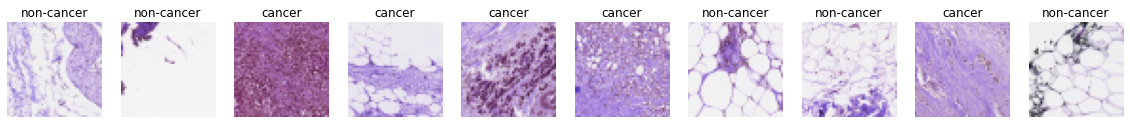

In [15]:
image_count = 10

_, axs = plt.subplots(1, image_count, figsize=(20, 20))
for i in range(image_count):
  random_idx=random.randint(0, train_x.shape[0])
  axs[i].imshow(train_x[random_idx], cmap='gray')
  axs[i].axis('off')
  axs[i].set_title(class_names[train_y_label[random_idx]])

In [16]:
batch_size = 250
input_shape = (50, 50, 3)

num_features = 7500#50*50*3
latent_dim = 32

In [ ]:
#vae = keras.models.load_model('models/vae.h5')
#encoder = keras.models.load_model('models/encoder.h5')
#decoder = keras.models.load_model('models/decoder.h5')

In [17]:
#vae = keras.models.load_model('models/vae.h5')
cvae_encoder = keras.models.load_model('models/cvae_encoder.h5')
cvae_decoder = keras.models.load_model('models/cvae_decoder.h5')

2022-04-26 10:33:14.781156: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
#condtional vae
class CVAE(keras.Model):
    def __init__(self, encoder, decoder, beta, **kwargs):
        super(CVAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.beta = beta
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]
    
    def conditional_input(self, inputs, image_size=[50,50,3], label_size=2): #inputs should be a 2 dim array
        input_img = layers.InputLayer(input_shape=image_size, dtype ='float32')(inputs[0])
        input_label = layers.InputLayer(input_shape=(label_size, ), dtype ='float32')(inputs[1])
        labels = tf.reshape(inputs[1], [-1, 1, 1, label_size]) #batch_size, 1, 1, label_size
        labels = tf.cast(labels, dtype='float32')
        ones = tf.ones([inputs[0].shape[0]] + image_size[0:-1] + [label_size]) #batch_size, 50, 50, label_size
        labels = ones * labels #batch_size, 50, 50, label_size
        conditional_input = layers.Concatenate(axis=3)([input_img, labels]) 
        return  input_img, input_label, conditional_input



    def train_step(self, data):
        inputs, y = data
        

        with tf.GradientTape() as tape:
            _, _, conditional_input = self.conditional_input(inputs)
            z_mean, z_log_var, z_cond = self.encoder(conditional_input)
            reconstruction = self.decoder(z_cond)
            reconstruction_loss = tf.reduce_sum(
                    keras.losses.MSE(inputs[0], reconstruction), axis=(1, 2) # mod, also 
                )
            
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + (self.beta * kl_loss)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [19]:
beta_coeff = 10
cvae = CVAE(encoder=cvae_encoder, decoder=cvae_decoder, beta=beta_coeff)
cvae.compile(optimizer='Adam')

In [20]:
train_x = np.array(train_x)
train_y = np.array(train_y)

In [ ]:
model = cvae
epochs = 50
#model.compile( optimizer='adam')
tf.config.run_functions_eagerly(True)
early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
history = cvae.fit([train_x, train_y], train_x, 
            epochs=epochs, batch_size=250, callbacks=early_stop)

In [ ]:
def Train_Val_Plot(loss, reconstruction_loss, kl_loss):
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize= (16,4))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(loss) + 1), loss)
    ax1.set_title('History of Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')

    ax2.plot(range(1, len(reconstruction_loss) + 1), reconstruction_loss)
    ax2.set_title('History of reconstruction_loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('reconstruction_loss')
    #ax1.legend(['training', 'validation'])

    #ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(kl_loss) + 1), kl_loss)

    ax3.set_title(' History of kl_loss')
    ax3.set_xlabel(' Epochs ')
    ax3.set_ylabel('kl_loss')
    #ax3.legend(['training', 'validation'])
     

    plt.show()
    

Train_Val_Plot(history.history['loss'],
               history.history['reconstruction_loss'],
               history.history['kl_loss']
               )

In [ ]:
cvae.save_weights('weights/cvae.h5')

In [ ]:
import pickle

with open('trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
import pandas as pd

object = pd.read_pickle(r'trainHistoryDict.txt')


In [ ]:
plt.imshow(train_x[0])
plt.show()

train_x[0].shape

print(train_y[0])
print(train_y_label[0])


In [ ]:
train_y[:1000].shape

In [22]:
#reconstruct train 
inputs = [train_x[:1000], train_y[:1000] ]
_, _, conditional_input = cvae.conditional_input(inputs)
train_x_latent = cvae_encoder.predict(conditional_input)[2]
print(train_x_latent.shape)
p = cvae_decoder.predict(train_x_latent)

(1000, 25, 25, 5)


In [23]:
#reconstruct test
inputs = [test_x[:1000], train_y[:1000] ]
_, _, conditional_input = cvae.conditional_input(inputs)
test_x_latent = cvae_encoder.predict(conditional_input)[2]
print(train_x_latent.shape)
q = cvae_decoder.predict(test_x_latent)

(1000, 25, 25, 5)


In [ ]:
mean, log_var, z = cvae_encoder.predict(conditional_input)


In [ ]:
var = np.exp(log_var)
print(mean.mean(), mean.std(), mean.min(), mean.max())
print(z.mean(), z.std(), z.min(), z.max())
print(var.mean(), var.std(), var.min(), var.max())

In [ ]:
np.sqrt(np.exp(-0.38956717)) # mean of sqrt(exp(log_var)) -> sd for noise

In [ ]:
a = [np.zeros((1,50,50,3))]
b = [0, 1]
c = [a, b]
c[0].shape


In [ ]:
cvae.encoder.get_layer('z_mean').weights[0]

In [21]:

cvae.built = True
cvae.load_weights('weights/cvae.h5')

In [ ]:
plt.imshow(p[0])
plt.show()

In [ ]:
plt.imshow(train_x[0])
plt.show()


In [24]:
def plot_predictions(y_true, y_pred):    
    f, ax = plt.subplots(2, 10, figsize=(15, 4))
    for i in range(10):
        ax[0][i].imshow(np.reshape(y_true[i], (50, 50, 3)), aspect='auto')
        ax[1][i].imshow(np.reshape(y_pred[i], (50, 50, 3)), aspect='auto')
    plt.tight_layout()

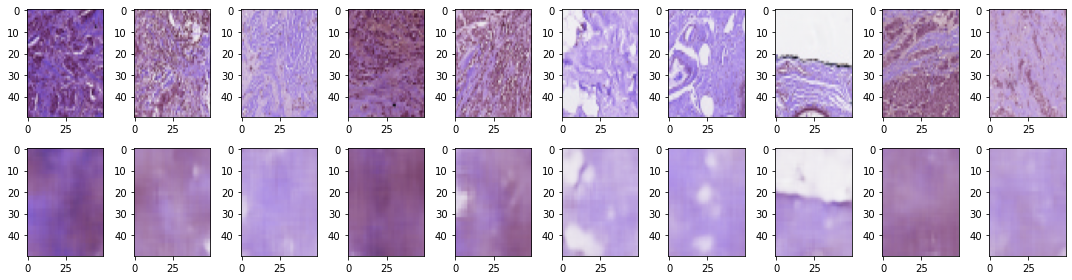

In [25]:
plot_predictions(train_x[:100], p)

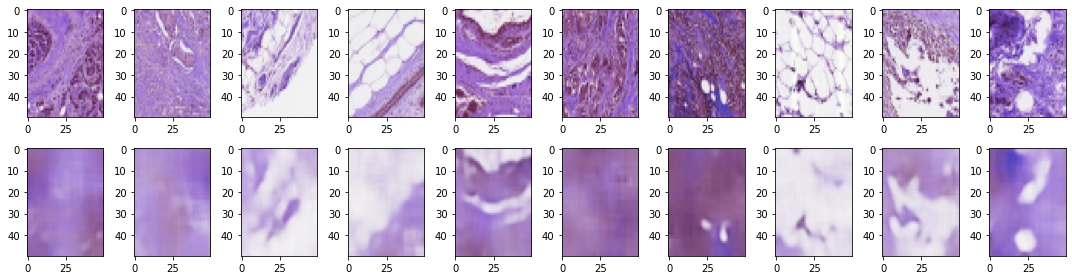

In [26]:
plot_predictions(test_x[:100], q)

In [ ]:
# Scatter with images instead of points
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
img_size = 50
def imscatter(x, y, ax, imageData, zoom):
    images = []
    for i in range(len(x)):
        x0, y0 = x[i], y[i]
        # Convert to image
        img = imageData[i]*255.
        img = img.astype(np.uint8).reshape([img_size,img_size,3])
        #img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        # Note: OpenCV uses BGR and plt uses RGB
        image = OffsetImage(img, zoom=zoom)
        ab = AnnotationBbox(image, (x0, y0), xycoords='data', frameon=False)
        images.append(ax.add_artist(ab))
    
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()

In [ ]:
#https://github.com/despoisj/LatentSpaceVisualization/blob/master/visuals.py
from sklearn import manifold

def computeTSNEProjectionOfLatentSpace(X, X_encoded, display=True, save=True):
    # Compute latent space representation
    print("Computing latent space projection...")
    #X_encoded = encoder.predict(X)

    # Compute t-SNE embedding of latent space
    print("Computing t-SNE embedding...")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X_encoded)

    # Plot images according to t-sne embedding
    if display:
        print("Plotting t-SNE visualization...")
        fig, ax = plt.subplots(figsize=(15, 15))
        ax = fig.add_subplot(111, facecolor='black')
        imscatter(X_tsne[:, 0], X_tsne[:, 1], imageData=X, ax=ax, zoom=0.5)
        if save:
            fig.savefig('img/t-SNE-embedding_Cvae_epochs:{}_beta:{}.png'.format(epochs, beta_coeff))
        plt.show()
    else:
        return X_tsne

In [ ]:
inputs = [train_x[:1000], train_y[:1000] ]
_, _, conditional_input = cvae.conditional_input(inputs)
X_encoded = cvae_encoder.predict(conditional_input)[0]

X_encoded.shape
#need to reshape for TSNE
X_encoded_flatten = X_encoded.reshape(-1,25*25*5)
X_encoded_flatten.shape


In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X_encoded_flatten)

In [ ]:
computeTSNEProjectionOfLatentSpace(train_x[:1000,], X_encoded_flatten, display=True, save=True)

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['y'] = train_y_label[:1000]
df['comp-1'] = X_tsne[:,0]
df['comp-2'] = X_tsne[:,1]

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
colors = {0:'blue', 1:'red'}

ax.scatter(df["comp-1"], df["comp-2"], c=df['y'].map(colors), label=colors) 
ax.legend()
plt.show()

In [ ]:
def computeTSNEProjectionOfPixelSpace(X, display=True):
    # Compute t-SNE embedding of latent space
    print("Computing t-SNE embedding...")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X.reshape([-1, 50* 50* 3]))

    # Plot images according to t-sne embedding
    if display:
        print("Plotting t-SNE visualization...")
        fig, ax = plt.subplots(figsize=(15, 15))
        ax = fig.add_subplot(111, facecolor='black')
        imscatter(X_tsne[:, 0], X_tsne[:, 1], imageData=X, ax=ax, zoom=0.5)
        fig.savefig('img/t-SNE_original_space.png')
        plt.show()
    else:
        return X_tsne

In [ ]:
#computeTSNEProjectionOfPixelSpace(train_x[:1000], display=True)

In [ ]:
def getReconstructedImages(X, y, encoder, decoder):
    img_size = 50
    nbSamples = X.shape[0]
    nbSquares = int(math.sqrt(nbSamples))
    nbSquaresHeight = 2*nbSquares
    nbSquaresWidth = nbSquaresHeight
    resultImage = np.zeros((nbSquaresHeight*img_size,int(nbSquaresWidth*img_size/2),X.shape[-1]))

    inputs = [X[:1000], y[:1000] ]
    _, _, conditional_input = cvae.conditional_input(inputs)
    reconstructedX = decoder.predict(encoder.predict(conditional_input)[2])

    for i in range(nbSamples) :     # 
        original = X[i]
        reconstruction = reconstructedX[i]
        rowIndex = i%nbSquaresWidth
        columnIndex = int((i-rowIndex)/nbSquaresHeight)
        resultImage[rowIndex*img_size:(rowIndex+1)*img_size,columnIndex*2*img_size:(columnIndex+1)*2*img_size,:] = np.hstack([original,reconstruction])

    return resultImage



In [ ]:
# Reconstructions for samples in dataset
def visualizeReconstructedImages(X_train, X_test, y_train, y_test, encoder, decoder, save=False):

    trainReconstruction = getReconstructedImages(X_train, y_train, encoder, decoder)
    testReconstruction = getReconstructedImages(X_test, y_test, encoder, decoder)

    if not save:
        print("Generating 10 image reconstructions...")

    result = np.hstack([trainReconstruction,
            np.zeros([trainReconstruction.shape[0],5,
            trainReconstruction.shape[-1]]),
            testReconstruction])
    result = (result*255.).astype(np.uint8)

    if save:
        fig, _ = plt.subplots(figsize=(15, 15))
        plt.imshow(result)
        fig.savefig('img/Cvae_reconstructions_epochs:{}_beta:{}.png'.format(epochs, beta_coeff))
    else:
        plt.show()


In [ ]:
visualizeReconstructedImages(train_x[:100], test_x[:100], train_y[:100], test_y[:100], cvae_encoder, cvae_decoder, save = True)

In [ ]:
labels = (0, 1)
loc = random.uniform(-.8, .8)
random_sample = np.array(np.random.normal(loc=loc, size=(1, 25, 25, 3)))

inputs = [random_sample, labels ]
_, _, conditional_input = cvae.conditional_input(inputs, image_size=[25,25,3])
print(conditional_input.shape)

decoded_x = cvae_decoder.predict(conditional_input)
decoded_x = (decoded_x*255.).astype(np.uint8)
plt.imshow((decoded_x[0]))


In [27]:
def generate_images(decoder, labels):    
    _, ax = plt.subplots(2, 10, figsize=(15, 4))
    for i in range(2):
        for j in range(10):
            loc = random.uniform(-.8, .8)
            random_sample = np.array(np.random.normal(loc= loc, scale = .82, size=(1, 25, 25, 3)))
            inputs = [random_sample, labels[i] ]
            _, _, conditional_input = cvae.conditional_input(inputs, image_size=[25,25,3])    
            #noise = np.array(noise)
            #random_sample = random_sample.reshape(1, 25, 25, 3)

            decoded =  decoder.predict(conditional_input).squeeze()
            ax[i][j].imshow( (decoded*255.).astype(np.uint8) )
       
    plt.tight_layout()

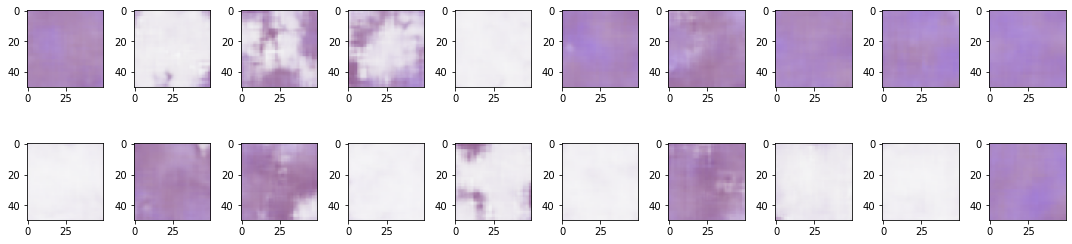

In [28]:
generate_images(cvae_decoder, [(0, 1), (1, 0)])

In [29]:
def generate_random_img(decoder, labels, samples=100):
    loc = random.uniform(-.8, .8)
    random_sample = np.array(np.random.normal(loc= loc, scale = 1, size=(samples, 25, 25, 3)))
    inputs = [random_sample, labels ]
    _, _, conditional_input = cvae.conditional_input(inputs, image_size=[25,25,3])    
    decoded =  decoder.predict(conditional_input)
    return decoded

In [30]:
def getGeneratedImages(X, y, encoder, decoder):
    img_size = 50
    nbSamples = X.shape[0]
    nbSquares = int(math.sqrt(nbSamples))
    nbSquaresHeight = 2*nbSquares
    nbSquaresWidth = nbSquaresHeight
    resultImage = np.zeros((nbSquaresHeight*img_size,int(nbSquaresWidth*img_size/2),X.shape[-1]))

    inputs = [X[:1000], y[:1000] ]
    _, _, conditional_input = cvae.conditional_input(inputs)
    reconstructedX = decoder.predict(encoder.predict(conditional_input)[2])

    for i in range(nbSamples) :     # 
        #original = X[i]
        reconstruction = reconstructedX[i]
        rowIndex = i%nbSquaresWidth
        columnIndex = int((i-rowIndex)/nbSquaresHeight)
        resultImage[rowIndex*img_size:(rowIndex+1)*img_size,columnIndex*2*img_size:(columnIndex+1)*2*img_size,:] = np.hstack([reconstruction])

    return resultImage


In [31]:
# Reconstructions for samples in dataset
def visualizeGeneratedImages(encoder, decoder, save=False):
    X_healthy = generate_random_img(decoder, labels = (0,1) )
    X_cancer = generate_random_img(decoder, labels= (1,0) )
    healthyReconstruction = getGeneratedImages(X = X_healthy, y= (0,1), encoder = encoder, decoder = decoder)
    cancerReconstruction = getGeneratedImages(X= X_cancer, y= (1,0), encoder = encoder, decoder = decoder)

    if not save:
        print("Generating 10 image reconstructions...")

    result = np.hstack([healthyReconstruction,
            np.zeros([healthyReconstruction.shape[0],5,
            healthyReconstruction.shape[-1]]),
            cancerReconstruction])
    result = (result*255.).astype(np.uint8)

    if save:
        fig, _ = plt.subplots(figsize=(15, 15))
        plt.imshow(result)
        fig.savefig('img/Cvae_generated_epochs:{}_beta:{}.png'.format(epochs, beta_coeff))
    else:
        plt.show()


In [32]:
visualizeGeneratedImages(cvae_encoder, cvae_decoder, save=True)

ValueError: could not broadcast input array from shape (50,50,3) into shape (50,100,3)

In [ ]:
#Shows linear inteprolation in image space vs latent space
def visualizeInterpolation( encoder, decoder, save=False, nbSteps=5):
    X_start = train_x[random.randint(0, train_x.shape[0])].reshape(1, 50, 50 ,3)
    X_end =train_x[random.randint(0, train_x.shape[0])].reshape(1, 50, 50 ,3)

    y_start = train_y[random.randint(0, train_x.shape[0])]
    y_end = train_y[random.randint(0, train_x.shape[0])]


    print("Generating interpolations...")

    inputs_start = [X_start, y_start]
    _, _, conditional_input_start = cvae.conditional_input(inputs_start, image_size=[50, 50, 3])
    conditional_input_start = tf.squeeze(conditional_input_start)

    inputs_end = [X_end, y_end ]
    _, _, conditional_input_end = cvae.conditional_input(inputs_end, image_size=[50, 50, 3])
    conditional_input_end = tf.squeeze(conditional_input_end)
    # Create micro batch
    X = np.array([ conditional_input_start, conditional_input_end])
    a = np.array([X_start, X_end]) #visualization of original images
    # Compute latent space projection
    latentX = encoder.predict(X)[0]
    latentStart, latentEnd = latentX
    print(latentStart.shape)
    print(latentEnd.shape)

    # Get original image for comparison
    startImage, endImage = a

    vectors = []
    normalImages = []
    #Linear interpolation
    alphaValues = np.linspace(0, 1, nbSteps)
    for alpha in alphaValues:
        # Latent space interpolation
        vector = latentStart*(1-alpha) + latentEnd*alpha
        vectors.append(vector)
        # Image space interpolation
        blendImage = cv2.addWeighted(startImage, 1-alpha, endImage, alpha, 0)
        normalImages.append(blendImage)

    # Decode latent space vectors
    vectors = np.array(vectors)
    reconstructions = decoder.predict(vectors)

    # Put final image together
    resultLatent = None
    resultImage = None

    for i in range(len(reconstructions)):
        interpolatedImage = normalImages[i]*255.
        interpolatedImage = interpolatedImage.reshape(50,50,3)
        #interpolatedImage = cv2.resize(interpolatedImage,(50,50))
        interpolatedImage = interpolatedImage.astype(np.uint8)
        resultImage = interpolatedImage if resultImage is None else np.hstack([resultImage,interpolatedImage])

        reconstructedImage = reconstructions[i]*255.
        reconstructedImage = reconstructedImage.reshape(50,50,3)
        #reconstructedImage = cv2.resize(reconstructedImage,(50,50))
        reconstructedImage = reconstructedImage.astype(np.uint8)
        resultLatent = reconstructedImage if resultLatent is None else np.hstack([resultLatent,reconstructedImage])

    result = np.vstack([resultImage, resultLatent])
    fig, ax = plt.subplots(figsize=(18, 4))
    ax.imshow(result)
    plt.tight_layout()
       #    plt.imshow(result)
    if save:
        
        fig.savefig('img/cvae_vector_interpolation_epochs:{}_beta:{}.png'.format(epochs, beta_coeff))
    


In [ ]:
visualizeInterpolation(encoder=cvae_encoder, decoder=cvae_decoder, save=True, nbSteps=10)